# DL Pac 2A

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#loading imdb data with most frequent 10000 words
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000) 


17464789/17464789 [==============================] - 7s 0us/step


In [4]:
data = np.concatenate((X_train, X_test), axis=0)
label = np.concatenate((y_train, y_test), axis=0)
X_train.shape

(25000,)

In [5]:
X_test.shape

(25000,)

In [6]:
y_train.shape

(25000,)

In [7]:
y_test.shape

(25000,)

In [8]:
print("Review is ",X_train[0])
# series of no converted word to vocabulory associated with index
print("Review is ",y_train[0])

Review is  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Review is  1


In [9]:
vocab=imdb.get_word_index() # Retrieve the word index file mapping words to indices
print(vocab)

1641221/1641221 [==============================] - 0s 0us/step
{'fawn': 34701, 'tsukino': 52006, 'nunnery': 52007, 'sonja': 16816, 'vani': 63951, 'woods': 1408, 'spiders': 16115, 'hanging': 2345, 'woody': 2289, 'trawling': 52008, "hold's": 52009, 'comically': 11307, 'localized': 40830, 'disobeying': 30568, "'royale": 52010, "harpo's": 40831, 'canet': 52011, 'aileen': 19313, 'acurately': 52012, "diplomat's": 52013, 'rickman': 25242, 'arranged': 6746, 'rumbustious': 52014, 'familiarness': 52015, "spider'": 52016, 'hahahah': 68804, "wood'": 52017, 'transvestism': 40833, "hangin'": 34702, 'bringing': 2338, 'seamier': 40834, 'wooded': 34703, 'bravora': 52018, 'grueling': 16817, 'wooden': 1636, 'wednesday': 16818, "'prix": 52019, 'altagracia': 34704, 'circuitry': 52020, 'crotch': 11585, 'busybody': 57766, "tart'n'tangy": 52021, 'burgade': 14129, 'thrace': 52023, "tom's": 11038, 'snuggles': 52025, 'francesco': 29114, 'complainers': 52027, 'templarios': 52125, '272': 40835, '273': 52028, 'zani

In [10]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [11]:
y_test

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [15]:
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
     results[i, sequence] = 1
    return results

In [16]:
# # Set a VALIDATION set
test_x = data[:10000]
test_y = label[:10000]
train_x = data[10000:]
train_y = label[10000:]
test_x.shape

(10000,)

In [17]:
test_y.shape

(10000,)

In [18]:
train_x.shape

(40000,)

In [19]:
train_y.shape

(40000,)

In [20]:
print("Categories:", np.unique(label))
print("Number of unique words:", len(np.unique(np.hstack(data))))

Categories: [0 1]
Number of unique words: 9998


In [21]:
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))

Average Review length: 234.75892


In [22]:
print("Standard Deviation:", round(np.std(length)))

Standard Deviation: 173


In [23]:
print("Label:", label[0])
Label: 1
print("Label:", label[1])
Label: 0
print(data[0])
# Retrieves a dict mapping words to their index in the IMDB dataset.
index = imdb.get_word_index() # word to index
# Create inverted index from a dictionary with document ids as keys and a list of terms as

reverse_index = dict([(value, key) for (key, value) in index.items()]) # id to word
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )
# The indices are offset by 3 because 0, 1 and 2 are reserved indices for "padding", "start of
print(decoded)


Label: 1
Label: 0
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
# this film was just brilliant casting loc

In [28]:
import numpy as np

def vectorize(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        if not all(isinstance(idx, int) for idx in sequence):
            raise ValueError("All elements in the sequence must be integers.")
        results[i, sequence] = 1
    return results


In [34]:
from sklearn.model_selection import train_test_split
subset_size = 1000  # adjust this value as needed
X_train, X_test, y_train, y_test = train_test_split(data[:subset_size], label[:subset_size], test_size=0.20, random_state=1)

In [35]:
X_train.shape
X_test.shape

(200, 10000)

In [36]:
# Let's create sequential model
from keras.utils import to_categorical
from keras import models
from keras import layers
model = models.Sequential()

In [37]:
# The input-layer takes 10,000 as input and outputs it with a shape of 50.
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))

In [38]:
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()
Model: "sequential"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500050    
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 505201 (1.93 MB)
Trainable params: 505201 

In [39]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [41]:
model.compile(
optimizer = "adam",
loss = "binary_crossentropy",
metrics = ["accuracy"]
)

In [42]:
from sklearn.model_selection import train_test_split
results = model.fit( X_train, y_train,epochs= 2,batch_size = 500,validation_data = (X_test,y_test),callbacks=[callback])

Epoch 1/2


2/2 [==============================] - 3s 268ms/step - loss: 0.6921 - accuracy: 0.5175 - val_loss: 0.6886 - val_accuracy: 0.5700
Epoch 2/2
2/2 [==============================] - 0s 64ms/step - loss: 0.6682 - accuracy: 0.6187 - val_loss: 0.6787 - val_accuracy: 0.5650


In [43]:
# Let's check mean accuracy of our model
print(np.mean(results.history["val_accuracy"]))
# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=500)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


0.5674999952316284
1/1 [==============================] - 0s 28ms/step - loss: 0.6787 - accuracy: 0.5650
Test loss: 0.6786976456642151
Test accuracy: 0.5649999976158142


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


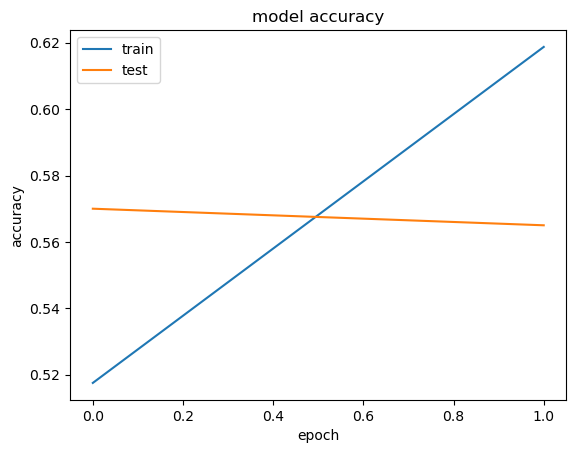

In [45]:
#Let's plot training history of our model.
# list all data in history
import matplotlib.pyplot as plt
print(results.history.keys())
# Summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch'